# A. Question 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv("Crimes_-_2001_to_Present_20230926.csv")

In [4]:
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013376,12194430,JD400047,10/22/2019 11:45:00 AM,031XX N ORCHARD ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7013377,12166069,JD367698,02/01/2019 09:00:00 AM,038XX N KEDZIE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,-87.707938,"(41.951016616, -87.707938347)",2.0,21538.0,16.0,325.0,20.0,39.0,1.0,23.0
7013378,12002967,JD178414,05/06/2018 04:58:00 PM,030XX W CERMAK RD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,-87.700974,"(41.851826431, -87.700973609)",29.0,21569.0,32.0,261.0,1.0,57.0,21.0,160.0
7013379,12006049,JD182022,03/11/2017 09:00:00 AM,054XX W CONGRESS PKWY,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013381 entries, 0 to 7013380
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Case Number                 object 
 2   Date                        object 
 3   Block                       object 
 4   IUCR                        object 
 5   Primary Type                object 
 6   Description                 object 
 7   Location Description        object 
 8   Arrest                      bool   
 9   Domestic                    bool   
 10  Beat                        int64  
 11  District                    float64
 12  Ward                        float64
 13  Community Area              float64
 14  FBI Code                    object 
 15  X Coordinate                float64
 16  Y Coordinate                float64
 17  Year                        int64  
 18  Updated On                  object 
 19  Latitude             

# I. Preprocessing

In [6]:
data['Primary Type'].value_counts()

THEFT                                1479906
BATTERY                              1280642
CRIMINAL DAMAGE                       797811
NARCOTICS                             726448
ASSAULT                               438755
OTHER OFFENSE                         435718
BURGLARY                              397652
MOTOR VEHICLE THEFT                   323139
DECEPTIVE PRACTICE                    285815
ROBBERY                               263552
CRIMINAL TRESPASS                     200037
WEAPONS VIOLATION                      76783
PROSTITUTION                           68979
PUBLIC PEACE VIOLATION                 49319
OFFENSE INVOLVING CHILDREN             49171
CRIM SEXUAL ASSAULT                    27399
SEX OFFENSE                            26946
INTERFERENCE WITH PUBLIC OFFICER       16637
GAMBLING                               14563
LIQUOR LAW VIOLATION                   14293
ARSON                                  11511
HOMICIDE                                9995
KIDNAPPING

We remove "DOMESTIC VIOLENCE" as there is only 1 record and this is hard to predict.

In [7]:
data = data[data['Primary Type'] != 'DOMESTIC VIOLENCE']

In [8]:
# Choose columns based on paper
data = data[["Date", "Primary Type", "Description", "Location", "Year", "Zip Codes", "Police Districts"]]

In [9]:
# Drop NaN rows
data = data.dropna().reset_index().drop(columns=["index"])

In [10]:
data

,Date,Primary Type,Description,Location,Year,Zip Codes,Police Districts
0,07/10/2005 03:00:00 PM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,"(41.781002663, -87.652107119)",2005,21559.0,17.0
1,08/12/2005 11:00:00 PM,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,"(41.779492755, -87.605912536)",2005,22260.0,18.0
2,02/01/2019 12:01:00 AM,BATTERY,SIMPLE,"(41.802924631, -87.687367104)",2019,22248.0,23.0
3,02/26/2006 04:00:00 PM,THEFT,RETAIL THEFT,"(41.937919992, -87.649024588)",2006,4449.0,5.0
4,08/30/2008 08:15:00 PM,BATTERY,SIMPLE,"(41.775891618, -87.75556842)",2008,22268.0,13.0
...,...,...,...,...,...,...,...
6924757,10/16/2019 06:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,"(41.845287889, -87.720915275)",2019,21569.0,21.0
6924758,01/01/2019 11:20:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,"(41.967923893, -87.656212265)",2019,22616.0,5.0
6924759,04/09/2019 12:00:00 AM,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,"(41.73099572, -87.563409251)",2019,21202.0,19.0
6924760,02/01/2019 09:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,"(41.951016616, -87.707938347)",2019,21538.0,1.0


## 1. Encode Primary Type

In [11]:
sorted(data['Primary Type'].unique())

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

In [12]:
data["Primary Type"] = data["Primary Type"].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')
data["Primary Type"] = data["Primary Type"].replace('NON - CRIMINAL', 'NON-CRIMINAL')

In [13]:
# Label Encoding for Primary Type
le = LabelEncoder()
data["Primary Type"] = le.fit_transform(data["Primary Type"])

## 2. Encode Description

In [14]:
sorted(data['Description'].unique())

['$300 AND UNDER',
 '$500 AND UNDER',
 'ABUSE / NEGLECT - CARE FACILITY',
 'ABUSE/NEGLECT: CARE FACILITY',
 'ADULTRY',
 'AGG CRIM SEX ABUSE FAM MEMBER',
 'AGG CRIMINAL SEXUAL ABUSE',
 'AGG PO HANDS ETC SERIOUS INJ',
 'AGG PO HANDS NO/MIN INJURY',
 'AGG PRO EMP HANDS SERIOUS INJ',
 'AGG PRO.EMP: HANDGUN',
 'AGG PRO.EMP: OTHER DANG WEAPON',
 'AGG PRO.EMP: OTHER FIREARM',
 'AGG PRO.EMP:KNIFE/CUTTING INST',
 'AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY',
 'AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY',
 'AGG RITUAL MUT:HANDGUN',
 'AGG RITUAL MUT:KNIFE/CUTTING I',
 'AGG RITUAL MUT:OTH DANG WEAPON',
 'AGG SEX ASSLT OF CHILD FAM MBR',
 'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
 'AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY',
 'AGG: FINANCIAL ID THEFT',
 'AGG: HANDS/FIST/FEET NO/MINOR INJURY',
 'AGG: HANDS/FIST/FEET SERIOUS INJURY',
 'AGGRAVATED',
 'AGGRAVATED - HANDGUN',
 'AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY',
 'AGGRAVATED - HANDS, FISTS, FEE

In [15]:
description = pd.read_csv("description.csv")
merged_df = data.merge(description, on='Description', how='left')
merged_df['Description'] = merged_df.apply(lambda row: row['Alternatives'] if not pd.isna(row['Alternatives']) else row['Description'], axis=1)
merged_df.drop(columns='Alternatives', inplace=True)
data = merged_df

In [16]:
data["Description"] = le.fit_transform(data["Description"])
data

,Date,Primary Type,Description,Location,Year,Zip Codes,Police Districts
0,07/10/2005 03:00:00 PM,2,42,"(41.781002663, -87.652107119)",2005,21559.0,17.0
1,08/12/2005 11:00:00 PM,12,237,"(41.779492755, -87.605912536)",2005,22260.0,18.0
2,02/01/2019 12:01:00 AM,2,311,"(41.802924631, -87.687367104)",2019,22248.0,23.0
3,02/26/2006 04:00:00 PM,31,298,"(41.937919992, -87.649024588)",2006,4449.0,5.0
4,08/30/2008 08:15:00 PM,2,311,"(41.775891618, -87.75556842)",2008,22268.0,13.0
...,...,...,...,...,...,...,...
6924757,10/16/2019 06:00:00 PM,8,148,"(41.845287889, -87.720915275)",2019,21569.0,21.0
6924758,01/01/2019 11:20:00 AM,8,150,"(41.967923893, -87.656212265)",2019,22616.0,5.0
6924759,04/09/2019 12:00:00 AM,21,17,"(41.73099572, -87.563409251)",2019,21202.0,19.0
6924760,02/01/2019 09:00:00 AM,8,150,"(41.951016616, -87.707938347)",2019,21538.0,1.0


## 3. Split Location into Latitude and Longitude

In [17]:
data[['Latitude', 'Longitude']] = data['Location'].str.extract(r'\((.*),\s*(.*)\)')

# Convert the new columns to float
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

## 4. Process Date

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour
data['Minute'] = data['Date'].dt.minute

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6924762 entries, 0 to 6924761
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Date              datetime64[ns]
 1   Primary Type      int32         
 2   Description       int32         
 3   Location          object        
 4   Year              int64         
 5   Zip Codes         float64       
 6   Police Districts  float64       
 7   Latitude          float64       
 8   Longitude         float64       
 9   Month             int64         
 10  Day               int64         
 11  Hour              int64         
 12  Minute            int64         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(5), object(1)
memory usage: 686.8+ MB


## 5. Check outliers

In [21]:
data.drop(columns=['Date', 'Location'], inplace=True)

data.to_csv("data_before_outliers.csv")

#### Check correlation of features to target

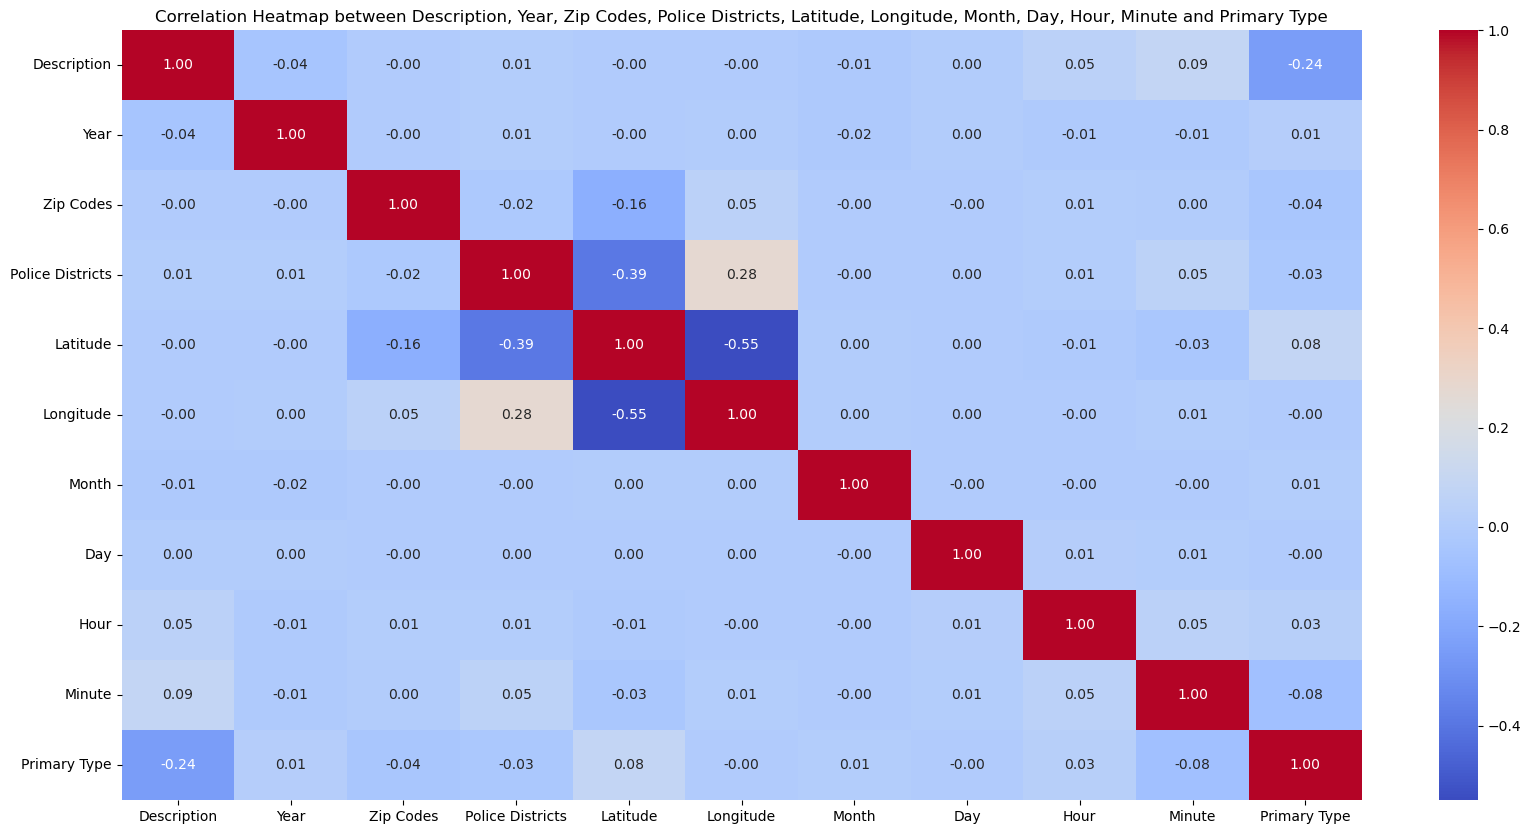

In [22]:
# Separate features and target
X = data.drop(columns=["Primary Type"])
y = data["Primary Type"]

features = X.columns.to_list()
target = "Primary Type"

# Calculate the correlation matrix
correlation_matrix = data[features + [target]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap between {", ".join(features)} and {target}')
plt.show()

'Description' has the most effect on 'Primary Type'.

#### Count of Primary Type

In [23]:
print(data['Primary Type'].value_counts())

31    1457291
2     1272906
5      792424
17     715276
1      435866
23     431273
3      395344
16     319475
8      270562
28     261370
7      198735
32      76290
24      68198
26      49016
21      45576
6       27313
29      25251
12      16545
9       14454
15      14139
0       11411
10       9979
14       6761
13       4069
30       3546
20        612
4         492
18        199
25        173
22        127
11         58
27         22
19          9
Name: Primary Type, dtype: int64


#### Count of Description

In [24]:
print(data['Description'].value_counts()[-50:])

44     15
91     14
250    13
158    12
204    11
330    10
139    10
355     9
231     9
89      9
254     9
108     8
49      8
232     8
82      7
144     7
112     6
115     6
370     6
206     6
3       6
62      6
45      6
99      6
207     6
10      5
143     5
296     5
191     5
8       5
193     5
9       5
159     4
360     4
260     4
7       4
11      3
61      3
58      3
57      3
167     3
6       3
228     2
295     2
224     1
328     1
134     1
317     1
196     1
349     1
Name: Description, dtype: int64


In [25]:
value_counts = data['Description'].value_counts()

data = data[data['Description'].map(value_counts) >= 5]

#### Count of Zip Codes

In [26]:
print(data['Zip Codes'].value_counts())

21861.0    303401
21554.0    299463
21572.0    268855
22216.0    263891
21546.0    259590
            ...  
21642.0        37
9460.0          8
26912.0         7
9458.0          3
4094.0          2
Name: Zip Codes, Length: 82, dtype: int64


#### Count of Police Districts

In [27]:
print(data['Police Districts'].value_counts())

13.0    466150
16.0    447183
17.0    405736
20.0    400757
6.0     396248
19.0    394808
18.0    352653
23.0    348814
15.0    340764
24.0    323443
5.0     310764
14.0    307847
10.0    305336
25.0    298472
21.0    297509
22.0    279539
7.0     272307
9.0     225264
12.0    224898
11.0    202097
1.0     200852
2.0     121753
4.0       1479
3.0         41
8.0          4
Name: Police Districts, dtype: int64


#### Count Plot for Date columns

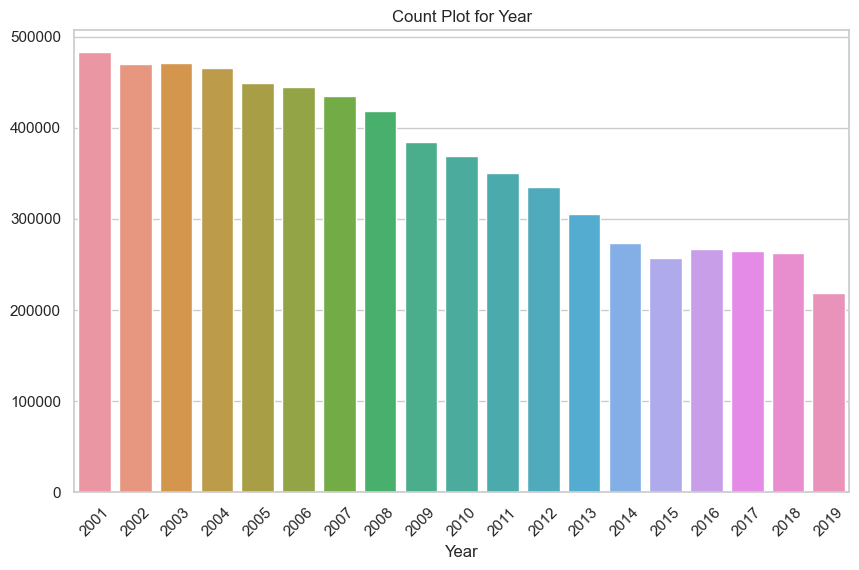

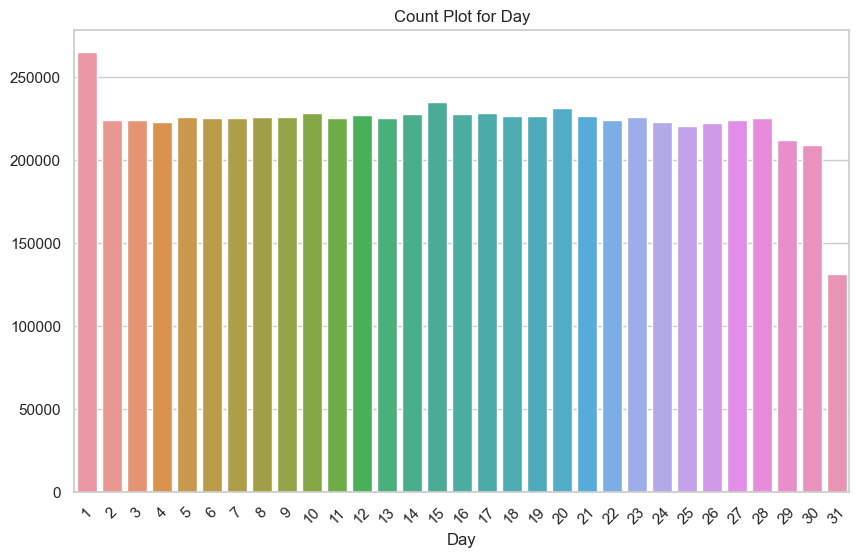

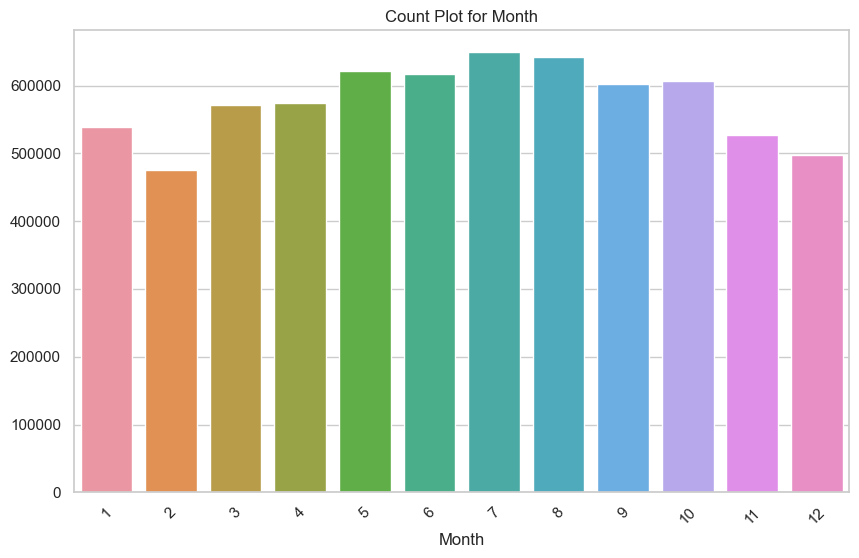

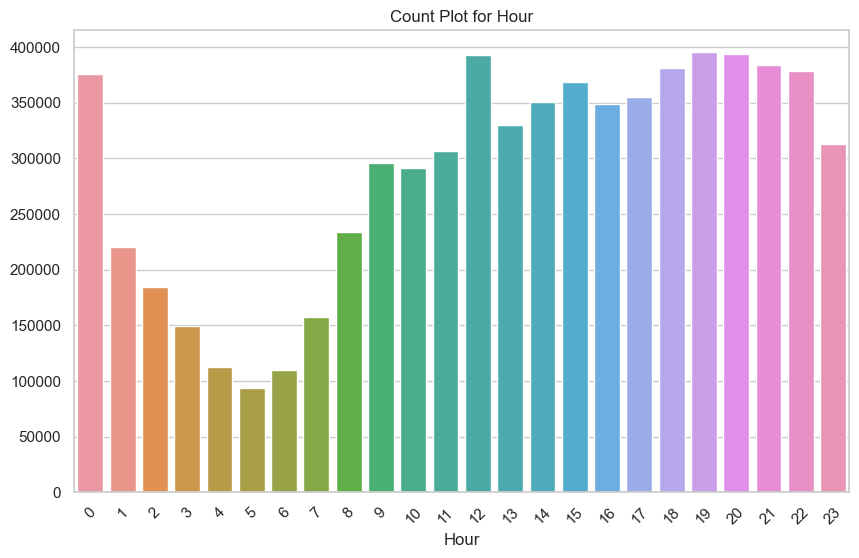

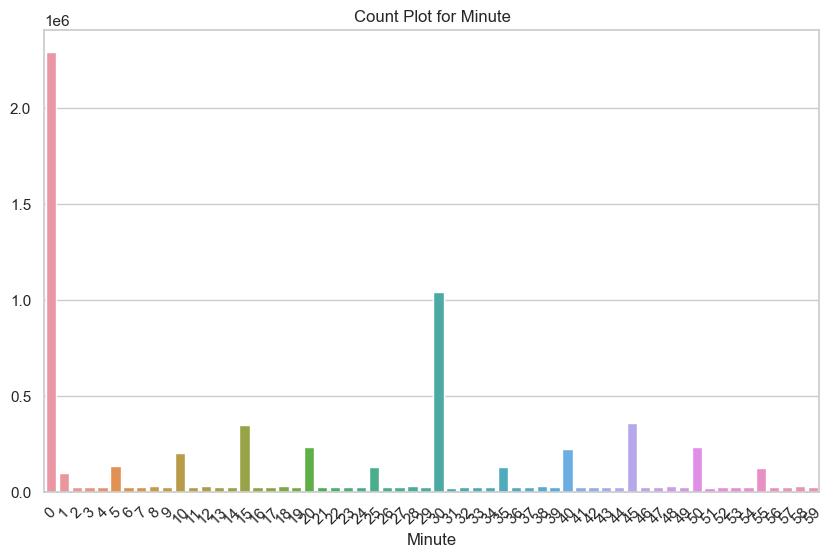

In [28]:
# Count Plot for Date data columns
columns = ['Year', 'Day', 'Month', 'Hour', 'Minute']

# Create count plots for all columns
sns.set(style="whitegrid")

# Loop through each column and create a count plot
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.ylabel('')
    plt.show()

#### Box plots for Longitude and Latitude

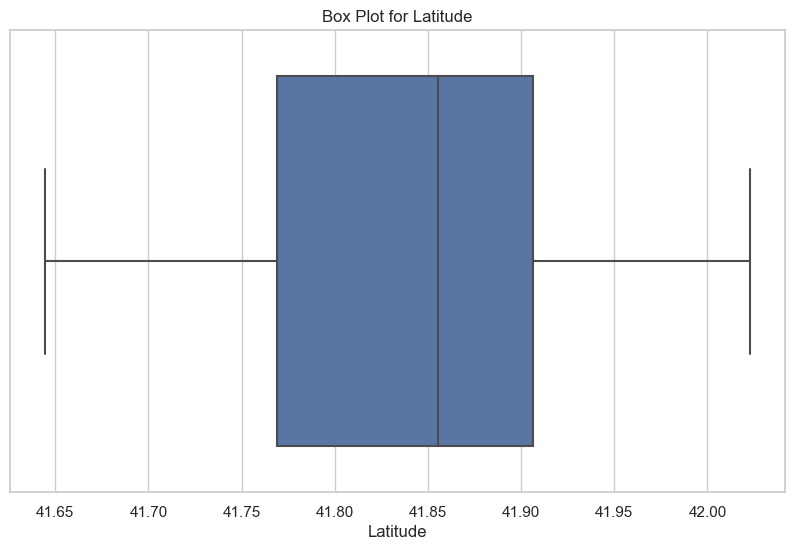

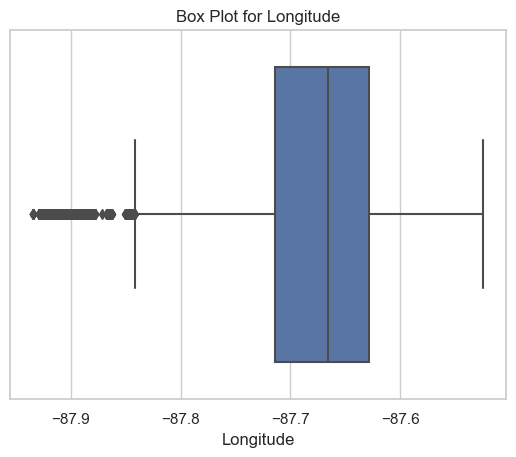

In [29]:
columns = ['Latitude', 'Longitude']

# Create a box plot for all columns
sns.set(style="whitegrid")  # Optional, to set the style
plt.figure(figsize=(10, 6))  # Optional, to adjust figure size

# Loop through each column and create a box plot
for column in columns:
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

#### Remove Longitude outliers

In [30]:
# Calculate the IQR
Q1 = data['Longitude'].quantile(0.25)
Q3 = data['Longitude'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'V17' column and create a new DataFrame without outliers
data = data[(data['Longitude'] >= lower_bound) & (data['Longitude'] <= upper_bound)]

# Optionally, you can reset the index of the new DataFrame
data.reset_index(drop=True, inplace=True)

In [31]:
data

,Primary Type,Description,Year,Zip Codes,Police Districts,Latitude,Longitude,Month,Day,Hour,Minute
0,2,42,2005,21559.0,17.0,41.781003,-87.652107,7,10,15,0
1,12,237,2005,22260.0,18.0,41.779493,-87.605913,8,12,23,0
2,2,311,2019,22248.0,23.0,41.802925,-87.687367,2,1,0,1
3,31,298,2006,4449.0,5.0,41.937920,-87.649025,2,26,16,0
4,2,311,2008,22268.0,13.0,41.775892,-87.755568,8,30,20,15
...,...,...,...,...,...,...,...,...,...,...,...
6893112,8,148,2019,21569.0,21.0,41.845288,-87.720915,10,16,18,0
6893113,8,150,2019,22616.0,5.0,41.967924,-87.656212,1,1,11,20
6893114,21,17,2019,21202.0,19.0,41.730996,-87.563409,4,9,0,0
6893115,8,150,2019,21538.0,1.0,41.951017,-87.707938,2,1,9,0


# II. Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = data.drop(columns="Primary Type")
y = data['Primary Type']

# Initialize and fit the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [ ]:
X_resampled

,Description,Year,Zip Codes,Police Districts,Latitude,Longitude,Month,Day,Hour,Minute
0,97,2007,22618.0,1.0,41.939364,-87.734582,5,11,15,15
1,97,2001,14920.0,15.0,41.854900,-87.669379,12,27,1,10
2,12,2016,22535.0,6.0,41.924534,-87.722580,7,9,5,27
3,97,2014,22257.0,17.0,41.769715,-87.665163,5,28,5,5
4,97,2004,4299.0,6.0,41.906246,-87.729304,5,22,14,56
...,...,...,...,...,...,...,...,...,...,...
292,346,2003,21569.0,21.0,41.856289,-87.712694,3,5,11,21
293,346,2010,22257.0,17.0,41.789649,-87.658403,8,29,1,10
294,357,2001,22535.0,7.0,41.918512,-87.683803,2,7,10,0
295,346,2008,14926.0,14.0,41.904192,-87.647001,9,9,22,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

### Logistic

In [ ]:
# Create a logistic regression model
log_model = LogisticRegression(multi_class='multinomial', C = 1, solver = 'sag', penalty = 'l2')

# Fit the model
log_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.03333333333333333
Precision (weighted): 0.011276948590381426
Recall (weighted): 0.03333333333333333
F1 Score (weighted): 0.015141612200435728
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.01      1.00      0.03         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
          14

### Gaussian Naive

In [ ]:
# Create a model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.3
Precision (weighted): 0.36333333333333334
Recall (weighted): 0.3
F1 Score (weighted): 0.2971957671957672
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.10      0.25      0.14         4
           3       0.00      0.00      0.00         2
           4       0.17      1.00      0.29         1
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         3
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         7
           9       1.00      1.00      1.00         2
          10       1.00      0.75      0.86         4
          11       0.33      0.50      0.40         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00    

### MLP

In [ ]:
# Create a model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.05555555555555555
Precision (weighted): 0.011692749087115284
Recall (weighted): 0.05555555555555555
F1 Score (weighted): 0.0156937441643324
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.25      0.33      0.29         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.07      0.50      0.12         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
          14  

### KNN

In [ ]:
# Create a model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.12222222222222222
Precision (weighted): 0.07121557454890788
Recall (weighted): 0.12222222222222222
F1 Score (weighted): 0.08259135925802592
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.08      0.25      0.12         4
           2       0.22      0.50      0.31         4
           3       0.00      0.00      0.00         2
           4       0.10      1.00      0.18         1
           5       0.08      0.50      0.13         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.33      0.25      0.29         4
          13       0.00      0.00      0.00         2
          14  

### Random Forest

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.3111111111111111
Precision (weighted): 0.2866666666666667
Recall (weighted): 0.3111111111111111
F1 Score (weighted): 0.27455908289241626
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.20      0.25      0.22         4
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         2
           4       0.25      1.00      0.40         1
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         3
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         7
           9       0.17      0.50      0.25         2
          10       0.00      0.00      0.00         4
          11       0.25      0.50      0.33         2
          12       0.00      0.00      0.00         4
          13       0.12      0.50      0.20         2
          14     

### XGBoost

In [ ]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5222222222222223
Precision (weighted): 0.5105555555555555
Recall (weighted): 0.5222222222222223
F1 Score (weighted): 0.4944708994708995
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         4
           2       0.33      0.50      0.40         4
           3       0.00      0.00      0.00         2
           4       0.33      1.00      0.50         1
           5       0.33      0.50      0.40         2
           6       0.40      0.67      0.50         3
           7       1.00      1.00      1.00         3
           8       0.00      0.00      0.00         7
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         4
          13       0.50      1.00      0.67         2
          14      

### SVM

In [ ]:
# Create a model
svm = SVC()

# TFit the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.011111111111111112
Precision (weighted): 0.00013550135501355014
Recall (weighted): 0.011111111111111112
F1 Score (weighted): 0.0002677376171352075
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.01      1.00      0.02         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
       

-> At this point, we can conclude that undersampling is not what the authors used.

# III. Oversampling

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# Separate features and target
X = data.drop(columns="Primary Type")
y = data['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

In [34]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [35]:
X_resampled

,Description,Year,Zip Codes,Police Districts,Latitude,Longitude,Month,Day,Hour,Minute
0,155,2011,4299.000000,6.000000,41.906611,-87.773086,11,27,18,0
1,311,2004,21869.000000,1.000000,41.968170,-87.734544,12,31,1,50
2,287,2008,22257.000000,17.000000,41.775130,-87.668978,3,28,11,30
3,346,2011,21861.000000,10.000000,41.668187,-87.620581,4,30,16,9
4,339,2018,21190.000000,5.000000,41.929889,-87.652543,10,4,1,30
...,...,...,...,...,...,...,...,...,...,...
33439489,346,2019,21202.000000,19.000000,41.731652,-87.556395,9,5,14,32
33439490,346,2005,4299.000000,16.000000,41.898150,-87.720013,5,27,0,28
33439491,279,2016,21572.000000,16.000000,41.880289,-87.732617,2,12,22,11
33439492,346,2006,4299.129843,15.610472,41.878309,-87.724214,9,17,14,30


In [36]:
y_resampled

0            3
1            2
2            1
3           32
4            5
            ..
33439489    32
33439490    32
33439491    32
33439492    32
33439493    32
Name: Primary Type, Length: 33439494, dtype: int32

In [37]:
oversampling_data = pd.merge(X_resampled, y_resampled,left_index=True, right_index=True)
oversampling_data

,Description,Year,Zip Codes,Police Districts,Latitude,Longitude,Month,Day,Hour,Minute,Primary Type
0,155,2011,4299.000000,6.000000,41.906611,-87.773086,11,27,18,0,3
1,311,2004,21869.000000,1.000000,41.968170,-87.734544,12,31,1,50,2
2,287,2008,22257.000000,17.000000,41.775130,-87.668978,3,28,11,30,1
3,346,2011,21861.000000,10.000000,41.668187,-87.620581,4,30,16,9,32
4,339,2018,21190.000000,5.000000,41.929889,-87.652543,10,4,1,30,5
...,...,...,...,...,...,...,...,...,...,...,...
33439489,346,2019,21202.000000,19.000000,41.731652,-87.556395,9,5,14,32,32
33439490,346,2005,4299.000000,16.000000,41.898150,-87.720013,5,27,0,28,32
33439491,279,2016,21572.000000,16.000000,41.880289,-87.732617,2,12,22,11,32
33439492,346,2006,4299.129843,15.610472,41.878309,-87.724214,9,17,14,30,32


Due to large amount of data, I took randomly each class in target 10000 instances to train.

In [38]:
from collections import Counter

class_counts = Counter(oversampling_data['Primary Type'])

# Create a balanced subset
subset = pd.DataFrame()

# Set the desired number of rows per class
desired_rows_per_class = 10000

for class_label, count in class_counts.items():
    if count >= desired_rows_per_class:
        # Randomly sample 10,000 rows from this class
        class_subset = oversampling_data[oversampling_data['Primary Type'] == class_label].sample(desired_rows_per_class, random_state=42)
    else:
        # If there are fewer than 10,000 rows for this class, include all of them
        class_subset = oversampling_data[oversampling_data['Primary Type'] == class_label]

    subset = pd.concat([subset, class_subset], ignore_index=True)

# The 'subset' DataFrame now contains 10,000 rows of each class
subset

,Description,Year,Zip Codes,Police Districts,Latitude,Longitude,Month,Day,Hour,Minute,Primary Type
0,155,2001,22260.000000,18.000000,41.769422,-87.586392,2,28,17,0,3
1,155,2002,14912.652667,22.000000,41.874964,-87.628646,4,19,3,6,3
2,155,2010,21546.000000,19.831696,41.751218,-87.608204,1,24,11,45,3
3,155,2005,21202.000000,19.000000,41.725525,-87.570492,1,5,1,5,3
4,343,2011,21849.000000,1.000000,41.972314,-87.713474,11,15,9,30,3
...,...,...,...,...,...,...,...,...,...,...,...
329995,231,2014,14924.000000,23.654049,41.801544,-87.646425,4,6,19,33,19
329996,231,2012,15166.880623,22.544840,41.797417,-87.673632,11,6,22,29,19
329997,231,2017,21863.585668,11.292834,41.725169,-87.651405,4,16,18,30,19
329998,231,2016,7779.014493,18.620246,41.866394,-87.696551,1,6,14,25,19


In [39]:
X_train = subset.drop(columns="Primary Type")
y_train = subset['Primary Type']

In [40]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

### Logistic

In [ ]:
# Create a logistic regression model
log_model = LogisticRegression(multi_class='multinomial', C = 1, solver = 'sag', penalty = 'l2')

# Fit the model
log_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.12525000773718337
Precision (weighted): 0.17614367243329418
Recall (weighted): 0.12525000773718337
F1 Score (weighted): 0.12259132988802
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.41      0.02      3422
           1       0.00      0.00      0.00    130447
           2       0.00      0.00      0.00    381061
           3       0.00      0.00      0.00    118526
           4       0.00      0.00      0.00       122
           5       0.51      0.51      0.51    237102
           6       0.01      0.01      0.01      8183
           7       0.27      0.37      0.31     58710
           8       0.19      0.01      0.02     80306
           9       0.02      0.24      0.04      4333
          10       0.01      0.17      0.02      2993
          11       0.00      0.41      0.00        17
          12       0.01      0.06      0.01      4953
          13       0.04      0.01      0.02      1218
          14     

### Gaussian NB

In [ ]:
# Create a model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.12432589790012843
Precision (weighted): 0.3305162234275933
Recall (weighted): 0.12432589790012843
F1 Score (weighted): 0.11936055589062779
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.64      0.03      3422
           1       0.00      0.00      0.00    130447
           2       0.44      0.00      0.00    381061
           3       0.01      0.00      0.00    118526
           4       0.00      0.69      0.00       122
           5       0.16      0.11      0.13    237102
           6       0.02      0.03      0.02      8183
           7       0.32      0.93      0.48     58710
           8       0.17      0.04      0.07     80306
           9       0.03      0.65      0.06      4333
          10       0.02      0.74      0.03      2993
          11       0.00      0.47      0.00        17
          12       0.02      0.22      0.03      4953
          13       0.01      0.50      0.03      1218
          14   

### MLP

In [ ]:
# Create a model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.006604169568110425
Precision (weighted): 4.3615055684355844e-05
Recall (weighted): 0.006604169568110425
F1 Score (weighted): 8.665780850693105e-05
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3422
           1       0.00      0.00      0.00    130447
           2       0.00      0.00      0.00    381061
           3       0.00      0.00      0.00    118526
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00    237102
           6       0.00      0.00      0.00      8183
           7       0.00      0.00      0.00     58710
           8       0.00      0.00      0.00     80306
           9       0.00      0.00      0.00      4333
          10       0.00      0.00      0.00      2993
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00      4953
          13       0.00      0.00      0.00      1218
       

### KNN

In [ ]:
# Create a model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.6470538740077062
Precision (weighted): 0.7914856347383808
Recall (weighted): 0.6470538740077062
F1 Score (weighted): 0.6922045579899125
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.80      0.33      3422
           1       0.38      0.54      0.45    130447
           2       0.90      0.50      0.64    381061
           3       0.75      0.66      0.70    118526
           4       0.02      0.44      0.03       122
           5       0.83      0.60      0.69    237102
           6       0.15      0.70      0.25      8183
           7       0.33      0.69      0.45     58710
           8       0.55      0.56      0.56     80306
           9       0.13      0.91      0.23      4333
          10       0.08      0.74      0.14      2993
          11       0.00      0.18      0.01        17
          12       0.13      0.74      0.21      4953
          13       0.24      0.79      0.37      1218
          14      

### XGBoost

In [ ]:
# Create a XGBoost classifier
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate various scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8071062160531081
Precision (weighted): 0.9057940554051856
Recall (weighted): 0.8071062160531081
F1 Score (weighted): 0.8381023422916957
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.97      0.45      3422
           1       0.42      0.51      0.46    130447
           2       0.96      0.50      0.66    381061
           3       0.96      0.96      0.96    118526
           4       0.01      1.00      0.03       122
           5       0.98      0.93      0.96    237102
           6       0.15      0.87      0.26      8183
           7       0.97      0.93      0.95     58710
           8       0.70      0.86      0.77     80306
           9       0.55      0.96      0.70      4333
          10       1.00      0.99      1.00      2993
          11       0.01      0.88      0.03        17
          12       0.99      0.97      0.98      4953
          13       0.73      0.99      0.84      1218
          14      

### SVM

In [41]:
# Create a model
svm = SVC(kernel='linear')

# TFit the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.18063663478947123
Precision (weighted): 0.28882695318495455
Recall (weighted): 0.18063663478947123
F1 Score (weighted): 0.1922394849062171
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.56      0.02      3422
           1       0.00      0.00      0.00    130447
           2       0.01      0.00      0.00    381061
           3       0.27      0.06      0.10    118526
           4       0.00      0.66      0.00       122
           5       0.69      0.58      0.63    237102
           6       0.02      0.06      0.03      8183
           7       0.27      0.61      0.38     58710
           8       0.18      0.12      0.14     80306
           9       0.04      0.63      0.07      4333
          10       0.01      0.33      0.02      2993
          11       0.00      0.41      0.00        17
          12       0.01      0.24      0.03      4953
          13       0.03      0.33      0.05      1218
          14   

### Random Forest

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.40756870618819924
Precision (weighted): 0.7580041984456337
Recall (weighted): 0.40756870618819924
F1 Score (weighted): 0.4639461736634047
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.57      0.06      3422
           1       0.35      0.21      0.27    130447
           2       0.85      0.01      0.02    381061
           3       0.81      0.50      0.62    118526
           4       0.00      0.90      0.00       122
           5       0.93      0.87      0.90    237102
           6       0.12      0.43      0.19      8183
           7       0.69      0.80      0.74     58710
           8       0.31      0.40      0.35     80306
           9       0.02      0.77      0.04      4333
          10       0.03      0.69      0.05      2993
          11       0.00      0.71      0.00        17
          12       0.03      0.51      0.06      4953
          13       0.08      0.59      0.14      1218
          14    

# III. No sampling

In [ ]:
data

,Primary Type,Description,Year,Zip Codes,Police Districts,Latitude,Longitude,Month,Day,Hour,Minute
0,2,42,2005,21559.0,17.0,41.781003,-87.652107,7,10,15,0
1,12,237,2005,22260.0,18.0,41.779493,-87.605913,8,12,23,0
2,2,311,2019,22248.0,23.0,41.802925,-87.687367,2,1,0,1
3,31,298,2006,4449.0,5.0,41.937920,-87.649025,2,26,16,0
4,2,311,2008,22268.0,13.0,41.775892,-87.755568,8,30,20,15
...,...,...,...,...,...,...,...,...,...,...,...
6893112,8,148,2019,21569.0,21.0,41.845288,-87.720915,10,16,18,0
6893113,8,150,2019,22616.0,5.0,41.967924,-87.656212,1,1,11,20
6893114,21,17,2019,21202.0,19.0,41.730996,-87.563409,4,9,0,0
6893115,8,150,2019,21538.0,1.0,41.951017,-87.707938,2,1,9,0


In [ ]:
# Separate features and target
X = data.drop(columns="Primary Type")
y = data['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

### Logistic

In [ ]:
# Create a logistic regression model
log_model = LogisticRegression(multi_class='multinomial', C = 1, solver = 'sag', penalty = 'l2')

# Fit the model
log_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.33737601163672376
Precision (weighted): 0.19984163327026438
Recall (weighted): 0.33737601163672376
F1 Score (weighted): 0.24380027041696614
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3422
           1       0.00      0.00      0.00    130447
           2       0.23      0.28      0.25    381061
           3       0.00      0.00      0.00    118526
           4       0.00      0.00      0.00       122
           5       0.40      0.94      0.56    237102
           6       0.00      0.00      0.00      8183
           7       0.05      0.00      0.01     58710
           8       0.00      0.00      0.00     80306
           9       0.00      0.00      0.00      4333
          10       0.00      0.00      0.00      2993
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00      4953
          13       0.00      0.00      0.00      1218
          14  

### Gaussian NB

In [ ]:
# Create a model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.3330499589929282
Precision (weighted): 0.22425236815306285
Recall (weighted): 0.3330499589929282
F1 Score (weighted): 0.25717632768872856
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3422
           1       0.00      0.00      0.00    130447
           2       0.33      0.26      0.29    381061
           3       0.00      0.00      0.00    118526
           4       0.00      0.00      0.00       122
           5       0.20      0.46      0.28    237102
           6       0.00      0.00      0.00      8183
           7       0.32      0.94      0.48     58710
           8       0.00      0.00      0.00     80306
           9       0.00      0.00      0.00      4333
          10       0.00      0.00      0.00      2993
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00      4953
          13       0.00      0.00      0.00      1218
          14    

### MLP

In [ ]:
# Create a model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.2100060156600591
Precision (weighted): 0.04410252661341299
Recall (weighted): 0.2100060156600591
F1 Score (weighted): 0.0728963757909171
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3422
           1       0.00      0.00      0.00    130447
           2       0.00      0.00      0.00    381061
           3       0.00      0.00      0.00    118526
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00    237102
           6       0.00      0.00      0.00      8183
           7       0.00      0.00      0.00     58710
           8       0.00      0.00      0.00     80306
           9       0.00      0.00      0.00      4333
          10       0.00      0.00      0.00      2993
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00      4953
          13       0.00      0.00      0.00      1218
          14     

### KNN

In [ ]:
# Create a model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8181607167726661
Precision (weighted): 0.8108546894224534
Recall (weighted): 0.8181607167726661
F1 Score (weighted): 0.8115717983099219
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      3422
           1       0.42      0.39      0.40    130447
           2       0.76      0.83      0.80    381061
           3       0.87      0.93      0.90    118526
           4       0.29      0.05      0.08       122
           5       0.79      0.91      0.85    237102
           6       0.79      0.56      0.66      8183
           7       0.53      0.35      0.42     58710
           8       0.79      0.65      0.72     80306
           9       0.88      0.58      0.70      4333
          10       0.31      0.08      0.12      2993
          11       0.00      0.00      0.00        17
          12       0.79      0.51      0.62      4953
          13       0.79      0.70      0.74      1218
          14      

### Random Forest

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.6628720618046207
Precision (weighted): 0.6634921901104706
Recall (weighted): 0.6628720618046207
F1 Score (weighted): 0.6008127323873964
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3422
           1       0.00      0.00      0.00    130447
           2       0.53      0.95      0.68    381061
           3       0.97      0.55      0.70    118526
           4       0.00      0.00      0.00       122
           5       0.93      0.96      0.94    237102
           6       0.00      0.00      0.00      8183
           7       1.00      0.72      0.84     58710
           8       0.81      0.24      0.37     80306
           9       0.00      0.00      0.00      4333
          10       0.00      0.00      0.00      2993
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00      4953
          13       0.00      0.00      0.00      1218
          14      

### XGBoost

In [ ]:
# Create a XGBoost classifier
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate various scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8931354742119679
Precision (weighted): 0.882777101393719
Recall (weighted): 0.8931354742119679
F1 Score (weighted): 0.8772880137403174
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      3422
           1       0.55      0.19      0.28    130447
           2       0.76      0.95      0.84    381061
           3       0.93      0.99      0.96    118526
           4       0.00      0.00      0.00       122
           5       0.97      0.97      0.97    237102
           6       0.74      0.41      0.53      8183
           7       0.97      0.93      0.95     58710
           8       0.95      0.80      0.87     80306
           9       0.94      0.07      0.13      4333
          10       0.98      0.99      0.99      2993
          11       0.00      0.00      0.00        17
          12       0.83      0.82      0.83      4953
          13       0.22      0.00      0.01      1218
          14       

### SVM

In [ ]:
# # Create a model
# svm = SVC()

# # TFit the model
# svm.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = svm.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# class_report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f"Precision (weighted): {precision}")
# print(f"Recall (weighted): {recall}")
# print(f"F1 Score (weighted): {f1}")
# print(f"Classification Report:\n{class_report}")

# B. Question 2

In [3]:
data = pd.read_csv("Crimes_-_2001_to_Present_20230926.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013381 entries, 0 to 7013380
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Case Number                 object 
 2   Date                        object 
 3   Block                       object 
 4   IUCR                        object 
 5   Primary Type                object 
 6   Description                 object 
 7   Location Description        object 
 8   Arrest                      bool   
 9   Domestic                    bool   
 10  Beat                        int64  
 11  District                    float64
 12  Ward                        float64
 13  Community Area              float64
 14  FBI Code                    object 
 15  X Coordinate                float64
 16  Y Coordinate                float64
 17  Year                        int64  
 18  Updated On                  object 
 19  Latitude             

### Drop meaningless columns

In [5]:
data.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'FBI Code', 'Year', 'Updated On', 'Location'], inplace = True)

### Drop NaN rows

In [6]:
# Drop NaN rows
data = data.dropna().reset_index().drop(columns=["index"])

### Process Date

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour
data['Minute'] = data['Date'].dt.minute

In [8]:
data.drop(columns='Date', inplace=True)

### Encode Primary Type

In [9]:
le = LabelEncoder()
data["Primary Type"] = data["Primary Type"].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')
data["Primary Type"] = data["Primary Type"].replace('NON - CRIMINAL', 'NON-CRIMINAL')

data["Primary Type"] = le.fit_transform(data["Primary Type"])

### Encode Description

In [10]:
# Map with corrected Description
description = pd.read_csv("description.csv")
merged_df = data.merge(description, on='Description', how='left')
merged_df['Description'] = merged_df.apply(lambda row: row['Alternatives'] if not pd.isna(row['Alternatives']) else row['Description'], axis=1)
merged_df.drop(columns='Alternatives', inplace=True)
data = merged_df

# Encode corrected Description
data["Description"] = le.fit_transform(data["Description"])
data

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,...,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Year,Month,Day,Hour,Minute
0,2,42,STREET,False,False,712,7.0,16.0,68.0,1170050.0,...,434.0,2.0,11.0,17.0,261.0,2005,7,10,15,0
1,12,237,SIDEWALK,True,False,312,3.0,20.0,42.0,1182654.0,...,332.0,4.0,60.0,18.0,277.0,2005,8,12,23,0
2,2,311,RESIDENCE,False,True,923,9.0,14.0,63.0,1160373.0,...,763.0,8.0,56.0,23.0,120.0,2019,2,1,0,1
3,31,298,DRUG STORE,False,False,2332,19.0,44.0,6.0,1170435.0,...,682.0,25.0,22.0,5.0,30.0,2006,2,26,16,0
4,2,311,STREET,False,False,813,8.0,13.0,64.0,1141844.0,...,337.0,15.0,7.0,13.0,271.0,2008,8,30,20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303974,8,150,OTHER,False,False,632,6.0,6.0,44.0,1181196.0,...,140.0,32.0,61.0,20.0,241.0,2019,2,5,0,0
6303975,8,148,OTHER (SPECIFY),False,False,1013,10.0,22.0,30.0,1151116.0,...,771.0,28.0,57.0,21.0,161.0,2019,10,16,18,0
6303976,21,17,RESIDENCE,False,True,423,4.0,7.0,48.0,1194405.0,...,493.0,37.0,25.0,19.0,238.0,2019,4,9,0,0
6303977,8,150,RESIDENCE,False,False,1733,17.0,33.0,16.0,1154371.0,...,325.0,20.0,39.0,1.0,23.0,2019,2,1,9,0


### Encode Location Description

In [11]:
# Map with corrected Location Description
location_description = pd.read_csv("location description.csv")
merged_df = data.merge(location_description, on='Location Description', how='left')
merged_df['Location Description'] = merged_df.apply(lambda row: row['Alternatives'] if not pd.isna(row['Alternatives']) else row['Location Description'], axis=1)
merged_df.drop(columns='Alternatives', inplace=True)
data = merged_df

# Encode corrected Location Description
data["Location Description"] = le.fit_transform(data["Location Description"])
data

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,...,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Year,Month,Day,Hour,Minute
0,2,42,158,False,False,712,7.0,16.0,68.0,1170050.0,...,434.0,2.0,11.0,17.0,261.0,2005,7,10,15,0
1,12,237,154,True,False,312,3.0,20.0,42.0,1182654.0,...,332.0,4.0,60.0,18.0,277.0,2005,8,12,23,0
2,2,311,138,False,True,923,9.0,14.0,63.0,1160373.0,...,763.0,8.0,56.0,23.0,120.0,2019,2,1,0,1
3,31,298,76,False,False,2332,19.0,44.0,6.0,1170435.0,...,682.0,25.0,22.0,5.0,30.0,2006,2,26,16,0
4,2,311,158,False,False,813,8.0,13.0,64.0,1141844.0,...,337.0,15.0,7.0,13.0,271.0,2008,8,30,20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303974,8,150,123,False,False,632,6.0,6.0,44.0,1181196.0,...,140.0,32.0,61.0,20.0,241.0,2019,2,5,0,0
6303975,8,148,124,False,False,1013,10.0,22.0,30.0,1151116.0,...,771.0,28.0,57.0,21.0,161.0,2019,10,16,18,0
6303976,21,17,138,False,True,423,4.0,7.0,48.0,1194405.0,...,493.0,37.0,25.0,19.0,238.0,2019,4,9,0,0
6303977,8,150,138,False,False,1733,17.0,33.0,16.0,1154371.0,...,325.0,20.0,39.0,1.0,23.0,2019,2,1,9,0


### Encode other columns

In [12]:
le = LabelEncoder()
data["Arrest"] = le.fit_transform(data["Arrest"])
data["Domestic"] = le.fit_transform(data["Domestic"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303979 entries, 0 to 6303978
Data columns (total 26 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Primary Type                int32  
 1   Description                 int32  
 2   Location Description        int32  
 3   Arrest                      int64  
 4   Domestic                    int64  
 5   Beat                        int64  
 6   District                    float64
 7   Ward                        float64
 8   Community Area              float64
 9   X Coordinate                float64
 10  Y Coordinate                float64
 11  Latitude                    float64
 12  Longitude                   float64
 13  Historical Wards 2003-2015  float64
 14  Zip Codes                   float64
 15  Community Areas             float64
 16  Census Tracts               float64
 17  Wards                       float64
 18  Boundaries - ZIP Codes      float64
 19  Police Districts     

### Apply SelectKBest to choose features selection

In [15]:
# Separate features and target
X = data.drop(columns='Primary Type')
y = data["Primary Type"]

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate SelectKBest with the chosen scoring function and K value
kbest = SelectKBest(score_func=chi2, k=6)  # Select the top 6 features

# Fit and transform the feature matrix to get the selected features
X_new = kbest.fit_transform(X_scaled, y)

# You can access the scores of the selected features using kbest.scores_
scores = kbest.scores_

# You can also get the indices of the selected features using kbest.get_support()
selected_feature_indices = kbest.get_support()

# Get the original feature names from DataFrame
feature_names = X.columns.tolist()

# Print the names of the selected features
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]
print("Selected feature names:", selected_feature_names)

Selected feature names: ['Description', 'Location Description', 'Arrest', 'Domestic', 'Hour', 'Minute']


### Check correlation of features to target

In [18]:
# Separate features and target
X = data[['Description', 'Location Description', 'Arrest', 'Domestic', 'Hour', 'Minute']]
y = data["Primary Type"]

features = X.columns.to_list()
target = "Primary Type"

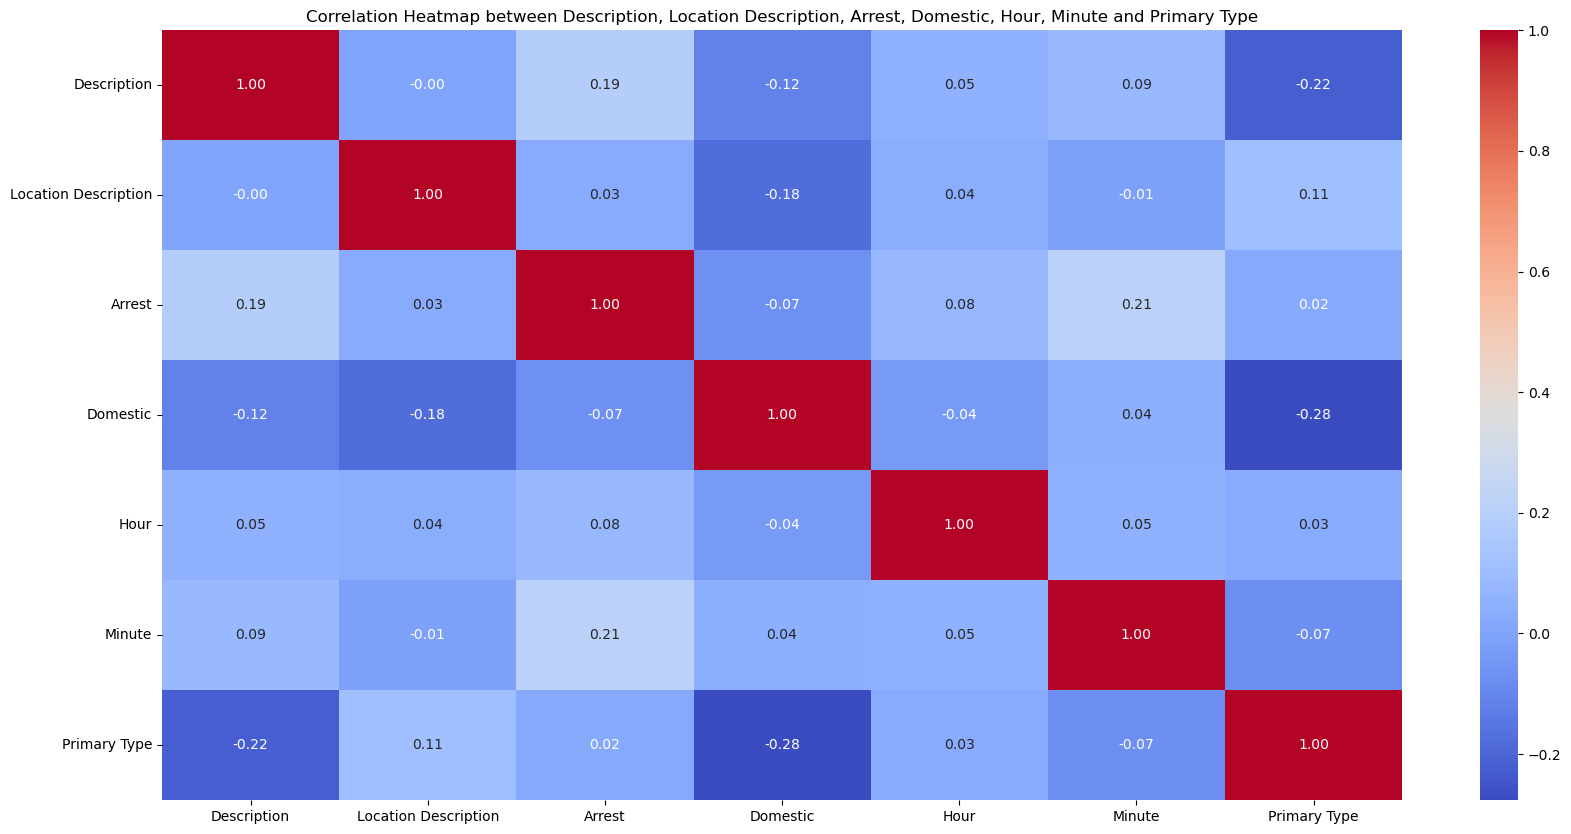

In [19]:
# Calculate the correlation matrix
correlation_matrix = data[features + [target]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap between {", ".join(features)} and {target}')
plt.show()

### Apply XGBoost

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.912310952763175
Precision (weighted): 0.9068949879748546
Recall (weighted): 0.912310952763175
F1 Score (weighted): 0.9049172031427485
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65      2020
           1       0.68      0.38      0.49     79158
           2       0.80      0.94      0.87    230754
           3       0.99      0.98      0.99     72495
           4       0.98      0.43      0.60        98
           5       0.97      0.98      0.98    144085
           6       0.73      0.64      0.68      5045
           7       0.97      0.93      0.95     36239
           8       0.91      0.80      0.85     49817
           9       0.71      0.85      0.78      2666
          10       0.98      1.00      0.99      1918
          11       0.00      0.00      0.00        11
          12       0.74      0.90      0.81      3206
          13       0.51      0.08      0.13       740
          14       0

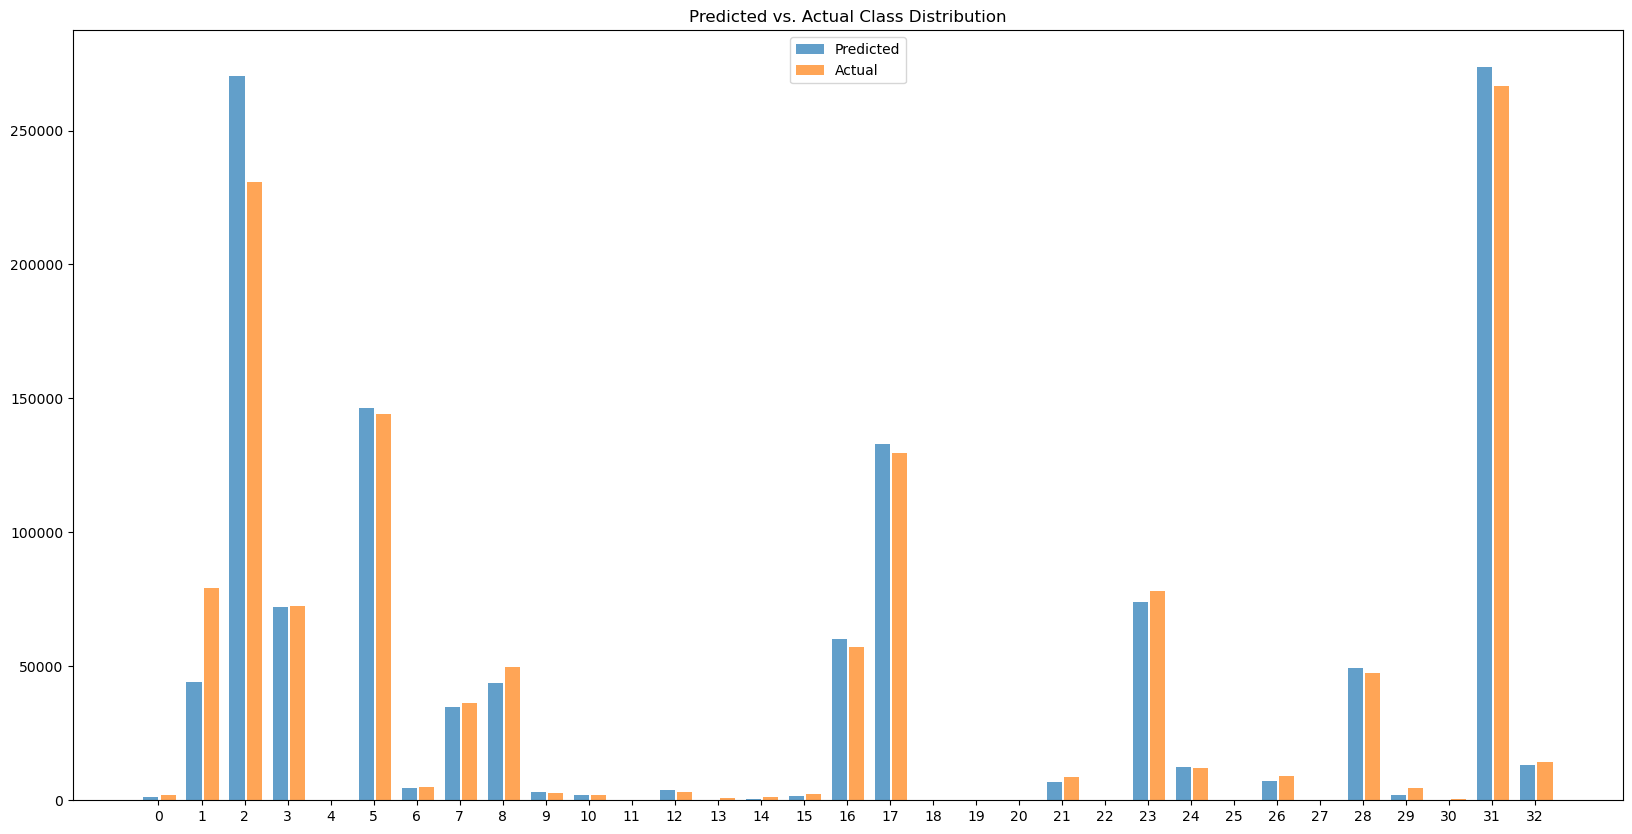

In [23]:
# Count the occurrences of each class in y_pred and y_test
unique_classes = np.unique(np.concatenate([y_pred, y_test]))
pred_class_counts = [np.sum(y_pred == cls) for cls in unique_classes]
true_class_counts = [np.sum(y_test == cls) for cls in unique_classes]

# Set the width of the bars
bar_width = 0.35
bar_gap = 0.05
index = np.arange(len(unique_classes))

# Create the bar chart
plt.figure(figsize=(20, 10))
plt.bar(index, pred_class_counts, bar_width, label='Predicted', alpha=0.7)
plt.bar(index + bar_width + bar_gap, true_class_counts, bar_width, label='Actual', alpha=0.7)
plt.xlabel('')
plt.ylabel('')
plt.title('Predicted vs. Actual Class Distribution')
plt.xticks(index + bar_width / 2, unique_classes)
plt.legend(loc='upper center')
plt.show()